In [110]:
import xml.etree.ElementTree as ET
import csv
transitions = 22
num = 0
field = ["starting station", 
         'destination station', 
         'steps', 
         'starting x', 
         'starting y', 
         'starting z',
         'step 1 x', 
         'step 1 y', 
         'step 1 z',
         'step 2 x', 
         'step 2 y', 
         'step 2 z', 
         'step 3 x', 
         'step 3 y', 
         'step 3 z'
        ]
errorcount = 0
origin = [{'0.020,0.000,0.000'},
{'-22.860,-53.340,0.000'},
{'-38.100,-68.580,0.000'},
{'-53.340,-83.820,0.000'},
{'-68.580,-99.060,0.000'},
{'-22.860,53.340,0.000'},
{'-38.100,68.580,0.000'},
{'-53.340,83.820,0.000'},
{'-68.580,99.060,0.000'},
{'-34.700,20.240,7.450'},
{'-34.700,-20.240,7.450'},
{'-35.065,0.000,13.148'},
{'-50.000,20.430,8.000'},
{'-50.000,-20.430,8.000'},
{'-56.100,0.000,13.900'},
{'-42.370,-14.770,11.890'},
{'-71.900,0.000,15.580'},
{'-83.820,-114.300,0.000'},
{'-83.820,114.300,0.000'},
{'-99.060,-129.540,0.000'},
{'-99.060,129.540,0.000'},
{'-68.600,0.000,17.410'},
{'-83.840,0.000,18.610'},
{'-133.840,0.000,18.610'},
{'-121.900,0.000,15.580'},
{'-150.000,20.430,8.000'},
{'-150.000,-20.430,8.000'}]
f = open('coordinates.txt','a')
for i in range(2,transitions):
    if i == 16 or i == 17:
        continue
    for j in range(2,transitions):
        if j == 16 or j == 17:
            continue
        if i != j:
            row = ''
            strI = str(i)
            strJ = str(j)
            try:
                tree = ET.parse('transitions\AAR Formation_StationChange_'+strI+'_'+strJ+'.xml')
                root = tree.getroot()
                grandchild = root[0][2]
                occurence = j+1
                stepnum = 0
                f.write(strI + ' to '+strJ+' | ' + str(origin[i-1]).strip("{''}") + ' ')
                for numsteps in grandchild.findall('component'):
                    val = -1
                    coord = grandchild[stepnum+1][3].text
                    stepnum += 1
                    for nextt in range(0,occurence):
                        val = coord.find('{',val+1)
                    end = coord.find('}',val)
                    f.write('step ' + str(stepnum) + ' ' +coord[val+1:end] + ' |')
                f.write('\n')    
                
                
            except FileNotFoundError:
                errorcount += 1
                #print('AAR Formation_StationChange_'+strI+'_'+strJ+'.xml doesnt exist')
f.close()
# print(num)
print(errorcount)

# tree = ET.parse('transitions\AAR Formation_StationChange_2_15.xml')
# root = tree.getroot()
# grandchild = root[0][2]
# occurence = 16

# for numsteps in grandchild.findall('component'):
#     val = -1
#     coord = grandchild[num+1][3].text
#     num += 1
#     for i in range(0,occurence):
#         val = coord.find('{',val+1)
#     end = coord.find('}',val)
#     print(coord[val+1:end])



4


In [111]:
# int1 = 2
# int2 = 3
# transistionsteps = {}
# test = {
#     'name': '2-3',
#     'start': origin[0],
#     "step 1": {24.5,60.22,-45.88},
#     "step 2":{},
#     "step 3":{}
# }
# transistionsteps[str(int1)+'-'+str(int2)] = test
# for point in transistionsteps['2-3']['step 1']:
    

In [112]:
something = '0.0020,0.010,0.060'
something = something.split(',')
something = list(map(float,something))
something
other = str(origin[0]).strip("{''}")
other = other.split(',')
other[0]

'0.020'

In [113]:
something[2]*float(other[0])

0.0012

In [115]:
with open('transitions.csv', mode='w',newline='') as transition_file:
    transition_writer = csv.writer(transition_file,delimiter=' ')
    header = []
    newheader = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
    counter = 0
    for title in newheader:
        counter+=1
        if counter != len(field):
            title += ','
        header.append(str(title))
        
    transition_writer.writerow(header)
    transitions = 22
    for i in range(2,transitions):
        if i == 16 or i == 17:
            continue
        else:
            for j in range(2,transitions):
                if j == 16 or j == 17 or (i == 15 and j == 12):
                    continue
                elif i == 10 and j != 13:
                    continue
                elif i == 11 and j != 14:
                    continue
                elif i == 12 and j != 15:
                    continue
                elif i != j:
                    strI = str(i)
                    strJ = str(j)
                    try:
                        tree = ET.parse('transitions\AAR Formation_StationChange_'+strI+'_'+strJ+'.xml')
                        root = tree.getroot()
                        grandchild = root[0][2]
                        occurence = j+1
                        stepnum = 0
                        stepcount = 0
                        for numsteps in grandchild.findall('component'):
                            stepcount += 1

                        row = []
                        row.append(strI+','+strJ+','+str(stepcount)+','+str(origin[i-1]).strip("{''}")+',')
                        for numsteps in grandchild.findall('component'):
                            val = -1
                            coord = grandchild[stepnum+1][3].text
                            stepnum += 1
                            for nextt in range(0,occurence):
                                val = coord.find('{',val+1)

                            end = coord.find('}',val)
                            row.append(coord[val+1:end])
                            if stepnum != stepcount:
                                row.append(',')


                        transition_writer.writerow(row)    


                    except FileNotFoundError:
                        errorcount += 1


In [116]:
import pandas as pd
df = pd.read_csv('transitions.csv')
df.columns = field
#df = df.fillna('')

partial = df.loc[lambda df: (df['starting station'] == 15) & (df['destination station'] == 3)]
print(partial.iloc[0])
partial = list(partial.iloc[0])


starting station       15.000
destination station     3.000
steps                   3.000
starting x            -56.100
starting y              0.000
starting z             13.900
step 1 x              -60.100
step 1 y              -41.148
step 1 z                7.000
step 2 x              -42.100
step 2 y              -68.580
step 2 z                0.000
step 3 x              -38.100
step 3 y              -68.580
step 3 z                0.000
Name: 170, dtype: float64


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget




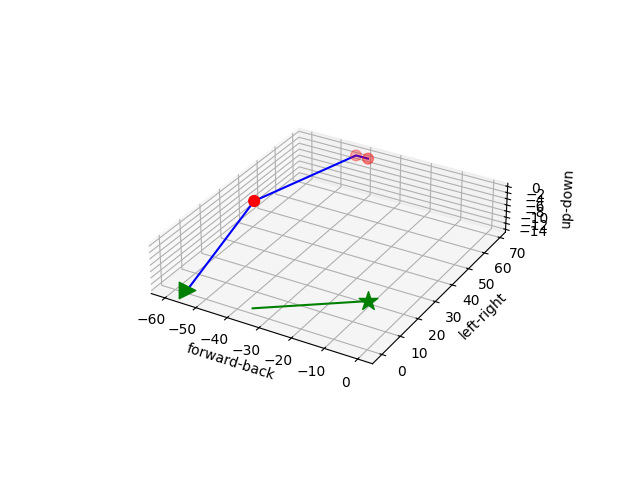

In [117]:
startingpoint = [partial[3],partial[4],partial[5]]
origin = [0.0,0.0,0.0]
boomx = [0, -35.065]
boomy = [0, 0]
boomz = [0, -13.148]
xvals = [partial[3],partial[6],partial[9],partial[12]]
yvals = [-partial[4],-partial[7],-partial[10],-partial[13]]
zvals = [-partial[5],-partial[8],-partial[11],-partial[14]]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x,y,z = xvals, yvals, zvals
ax.scatter(x[1:],y[1:],z[1:], c= 'r', s=60)
ax.scatter(partial[3],-partial[4],-partial[5], marker='>', c='g', s=140)
ax.scatter(origin[0],origin[0],origin[0],marker='*', c='g',s=200)
ax.plot(x,y,z, color='b')
ax.plot(boomx,boomy,boomz, color='g')
ax.set_xlabel('forward-back')
ax.set_ylabel('left-right')
ax.set_zlabel('up-down')
ax.set_aspect('equal')
plt.show()